In [2]:
import pandas as pd
import pylab
import scipy.stats as stats
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
pd.set_option('display.max_columns', None)


In [45]:
df1 = pd.read_csv('gestures_feat_engi.csv')
# df=df.drop(['index'],axis=1)

df1.head(3)

,time,gfc_x,gfc_y,gfc_z,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,inc_x,inc_y,inc_z,label,gfc_x_temp_mean_ws_4,gfc_y_temp_mean_ws_4,gfc_z_temp_mean_ws_4,acc_x_temp_mean_ws_4,acc_y_temp_mean_ws_4,acc_z_temp_mean_ws_4,gyr_x_temp_mean_ws_4,gyr_y_temp_mean_ws_4,gyr_z_temp_mean_ws_4,mag_x_temp_mean_ws_4,mag_y_temp_mean_ws_4,mag_z_temp_mean_ws_4,inc_x_temp_mean_ws_4,inc_y_temp_mean_ws_4,inc_z_temp_mean_ws_4,gfc_x_temp_max_ws_4,gfc_y_temp_max_ws_4,gfc_z_temp_max_ws_4,acc_x_temp_max_ws_4,acc_y_temp_max_ws_4,acc_z_temp_max_ws_4,gyr_x_temp_max_ws_4,gyr_y_temp_max_ws_4,gyr_z_temp_max_ws_4,mag_x_temp_max_ws_4,mag_y_temp_max_ws_4,mag_z_temp_max_ws_4,inc_x_temp_max_ws_4,inc_y_temp_max_ws_4,inc_z_temp_max_ws_4,gfc_x_temp_min_ws_4,gfc_y_temp_min_ws_4,gfc_z_temp_min_ws_4,acc_x_temp_min_ws_4,acc_y_temp_min_ws_4,acc_z_temp_min_ws_4,gyr_x_temp_min_ws_4,gyr_y_temp_min_ws_4,gyr_z_temp_min_ws_4,mag_x_temp_min_ws_4,mag_y_temp_min_ws_4,mag_z_temp_min_ws_4,inc_x_temp_min_ws_4,inc_y_temp_min_ws_4,inc_z_temp_min_ws_4,gfc_x_temp_std_ws_4,gfc_y_temp_std_ws_4,gfc_z_temp_std_ws_4,acc_x_temp_std_ws_4,acc_y_temp_std_ws_4,acc_z_temp_std_ws_4,gyr_x_temp_std_ws_4,gyr_y_temp_std_ws_4,gyr_z_temp_std_ws_4,mag_x_temp_std_ws_4,mag_y_temp_std_ws_4,mag_z_temp_std_ws_4,inc_x_temp_std_ws_4,inc_y_temp_std_ws_4,inc_z_temp_std_ws_4,gfc_x_temp_mean_ws_8,gfc_y_temp_mean_ws_8,gfc_z_temp_mean_ws_8,acc_x_temp_mean_ws_8,acc_y_temp_mean_ws_8,acc_z_temp_mean_ws_8,gyr_x_temp_mean_ws_8,gyr_y_temp_mean_ws_8,gyr_z_temp_mean_ws_8,mag_x_temp_mean_ws_8,mag_y_temp_mean_ws_8,mag_z_temp_mean_ws_8,inc_x_temp_mean_ws_8,inc_y_temp_mean_ws_8,inc_z_temp_mean_ws_8,gfc_x_temp_max_ws_8,gfc_y_temp_max_ws_8,gfc_z_temp_max_ws_8,acc_x_temp_max_ws_8,acc_y_temp_max_ws_8,acc_z_temp_max_ws_8,gyr_x_temp_max_ws_8,gyr_y_temp_max_ws_8,gyr_z_temp_max_ws_8,mag_x_temp_max_ws_8,mag_y_temp_max_ws_8,mag_z_temp_max_ws_8,inc_x_temp_max_ws_8,inc_y_temp_max_ws_8,inc_z_temp_max_ws_8,gfc_x_temp_min_ws_8,gfc_y_temp_min_ws_8,gfc_z_temp_min_ws_8,acc_x_temp_min_ws_8,acc_y_temp_min_ws_8,acc_z_temp_min_ws_8,gyr_x_temp_min_ws_8,gyr_y_temp_min_ws_8,gyr_z_temp_min_ws_8,mag_x_temp_min_ws_8,mag_y_temp_min_ws_8,mag_z_temp_min_ws_8,inc_x_temp_min_ws_8,inc_y_temp_min_ws_8,inc_z_temp_min_ws_8,gfc_x_temp_std_ws_8,gfc_y_temp_std_ws_8,gfc_z_temp_std_ws_8,acc_x_temp_std_ws_8,acc_y_temp_std_ws_8,acc_z_temp_std_ws_8,gyr_x_temp_std_ws_8,gyr_y_temp_std_ws_8,gyr_z_temp_std_ws_8,mag_x_temp_std_ws_8,mag_y_temp_std_ws_8,mag_z_temp_std_ws_8,inc_x_temp_std_ws_8,inc_y_temp_std_ws_8,inc_z_temp_std_ws_8,gfc_x_temp_mean_ws_12,gfc_y_temp_mean_ws_12,gfc_z_temp_mean_ws_12,acc_x_temp_mean_ws_12,acc_y_temp_mean_ws_12,acc_z_temp_mean_ws_12,gyr_x_temp_mean_ws_12,gyr_y_temp_mean_ws_12,gyr_z_temp_mean_ws_12,mag_x_temp_mean_ws_12,mag_y_temp_mean_ws_12,mag_z_temp_mean_ws_12,inc_x_temp_mean_ws_12,inc_y_temp_mean_ws_12,inc_z_temp_mean_ws_12,gfc_x_temp_max_ws_12,gfc_y_temp_max_ws_12,gfc_z_temp_max_ws_12,acc_x_temp_max_ws_12,acc_y_temp_max_ws_12,acc_z_temp_max_ws_12,gyr_x_temp_max_ws_12,gyr_y_temp_max_ws_12,gyr_z_temp_max_ws_12,mag_x_temp_max_ws_12,mag_y_temp_max_ws_12,mag_z_temp_max_ws_12,inc_x_temp_max_ws_12,inc_y_temp_max_ws_12,inc_z_temp_max_ws_12,gfc_x_temp_min_ws_12,gfc_y_temp_min_ws_12,gfc_z_temp_min_ws_12,acc_x_temp_min_ws_12,acc_y_temp_min_ws_12,acc_z_temp_min_ws_12,gyr_x_temp_min_ws_12,gyr_y_temp_min_ws_12,gyr_z_temp_min_ws_12,mag_x_temp_min_ws_12,mag_y_temp_min_ws_12,mag_z_temp_min_ws_12,inc_x_temp_min_ws_12,inc_y_temp_min_ws_12,inc_z_temp_min_ws_12,gfc_x_temp_std_ws_12,gfc_y_temp_std_ws_12,gfc_z_temp_std_ws_12,acc_x_temp_std_ws_12,acc_y_temp_std_ws_12,acc_z_temp_std_ws_12,gyr_x_temp_std_ws_12,gyr_y_temp_std_ws_12,gyr_z_temp_std_ws_12,mag_x_temp_std_ws_12,mag_y_temp_std_ws_12,mag_z_temp_std_ws_12,inc_x_temp_std_ws_12,inc_y_temp_std_ws_12,inc_z_temp_std_ws_12,gfc_x_max_freq,gfc_x_freq_weighted,gfc_x_pse,gfc_x_freq_0.0_Hz_ws_66,gfc_x_freq_0.101_Hz_ws_66,gfc_x_freq_0.202_Hz_ws_66,gfc_x_freq_0.303_Hz_ws_66,gfc_x_freq_0.404_Hz_ws_66,gfc_x_freq_0.505_Hz_

In [52]:
df = df1.iloc[:, :100]
# df_first_15_cols.head(2)

In [48]:
df

,time,gfc_x,gfc_y,gfc_z,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,inc_x,inc_y,inc_z,label,gfc_x_temp_mean_ws_4,gfc_y_temp_mean_ws_4,gfc_z_temp_mean_ws_4,acc_x_temp_mean_ws_4,acc_y_temp_mean_ws_4,acc_z_temp_mean_ws_4,gyr_x_temp_mean_ws_4,gyr_y_temp_mean_ws_4,gyr_z_temp_mean_ws_4,mag_x_temp_mean_ws_4,mag_y_temp_mean_ws_4,mag_z_temp_mean_ws_4,inc_x_temp_mean_ws_4,inc_y_temp_mean_ws_4,inc_z_temp_mean_ws_4,gfc_x_temp_max_ws_4,gfc_y_temp_max_ws_4,gfc_z_temp_max_ws_4,acc_x_temp_max_ws_4,acc_y_temp_max_ws_4,acc_z_temp_max_ws_4,gyr_x_temp_max_ws_4,gyr_y_temp_max_ws_4
0,2023-06-08 16:44:55.950,0.020082,0.014773,0.980182,0.006200,-0.031082,-0.206045,0.006595,-0.001950,-0.032759,185.340000,83.839091,-32.250000,300.827559,-1.049591,1.106823,rest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-06-08 16:44:56.100,0.020082,0.014773,0.980182,0.006200,-0.031082,-0.206045,0.006595,-0.001950,-0.032759,185.340000,83.839091,-32.250000,300.827559,-1.049591,1.106823,rest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-06-08 16:44:56.250,0.011158,0.027933,0.995408,-0.037542,0.034142,-0.057250,0.006312,0.007354,-0.002104,185.975000,82.922500,-32.112500,294.368688,-1.397988,0.908512,rest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-06-08 16:44:56.400,0.016180,0.022590,0.995210,0.003410,-0.040190,-0.044340,-0.009860,-0.007945,-0.004920,179.964000,79.404000,-27.456000,294.300950,-1.534310,0.810780,rest,0.016875,0.020017,0.987745,-0.005433,-0.017053,-0.128420,0.002411,-0.001123,-0.018136,184.154750,82.501170,-31.017125,297.581189,-1.257870,0.983234,0.020082,0.027933,0.995408,0.006200,0.034142,-0.044340,0.006595,0.007354
4,2023-06-08 16:44:56.550,0.022350,0.009575,0.988850,0.061683,-0.123242,-0.106292,0.001287,0.003938,-0.002892,175.780000,77.375000,-23.380000,294.201417,-1.261021,0.963921,rest,0.017443,0.018718,0.989913,0.008438,-0.040093,-0.103482,0.001084,0.000349,-0.010669,181.764750,80.885148,-28.799625,295.924653,-1.310727,0.947509,0.022350,0.027933,0.995408,0.061683,0.034142,-0.044340,0.006595,0.007354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39289,2023-06-08 18:23:09.300,0.015645,0.017985,0.976427,0.022374,-0.003346,-0.230519,-0.001422,0.001116,-0.003314,190.438364,65.163818,11.775818,189.453542,-1.053076,0.764111,rest,0.015123,0.017359,0.976353,0.019927,-0.011324,-0.227293,-0.001371,0.001293,-0.003396,190.163517,65.095997,12.487019,189.411896,-1.069358,0.753919,0.015645,0.017985,0.978122,0.025575,-0.003346,-0.214670,-0.001225,0.001567
39290,2023-06-08 18:23:09.450,0.015742,0.018678,0.977091,0.020774,0.004294,-0.229537,-0.001521,0.000891,-0.003195,190.782545,65.400727,11.088727,189.481340,-1.044310,0.771694,rest,0.015596,0.017639,0.976095,0.023174,-0.007166,-0.231010,-0.001373,0.001229,-0.003373,190.266273,65.045364,12.119364,189.439643,-1.057459,0.760320,0.015742,0.018678,0.977091,0.025575,0.004294,-0.229537,-0.001225,0.001567
39291,2023-06-08 18:23:09.600,0.015839,0.019371,0.977755,0.019173,0.011933,-0.228555,-0.001620,0.000666,-0.003077,191.126727,65.637636,10.401636,189.509138,-1.035543,0.779276,rest,0.015693,0.018332,0.976759,0.021574,0.000474,-0.230028,-0.001472,0.001004,-0.003255,190.610455,65.282273,11.432273,189.467441,-1.048693,0.767902,0.015839,0.019371,0.977755,0.023975,0.011933,-0.228555,-0.001324,0.001342
39292,2023-06-08 18:23:09.750,0.015936,0.020064,0.978418,0.017573,0.019573,-0.227573,-0.001718,0.000441,-0.002959,191.470909,65.874545,9.714545,189.536936,-1.026777,0.786859,rest,0.015790,0.019025,0.977423,0.019973,0.008113,-0.229046,-0.001570,0.000779,-0.003136,190.954636,65.519182,10.745182,189.495239,-1.039927,0.775485,0.015936,0.020064,0.978418,0.022374,0.019573,-0.227573,-0.001422,0.001116


In [47]:
df['label']

0        rest
1        rest
2        rest
3        rest
4        rest
         ... 
39289    rest
39290    rest
39291    rest
39292    rest
39293    rest
Name: label, Length: 39294, dtype: object

In [53]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Load the data
# df = pd.read_csv('gestures.csv')
df = df.dropna()
X = df.drop(['label','time'], axis=1)
y = df['label']

# Create an instance of the logistic regression model
estimator = LogisticRegression()

# Create an instance of RFE with the logistic regression model and specify the number of features to select
rfe = RFE(estimator, n_features_to_select=10)

# Fit RFE to your data
rfe.fit(X, y)

# Get the ranking of features (higher ranking means less important)
feature_ranking = rfe.ranking_

# Get the mask of selected features (True represents selected features)
selected_features = rfe.support_

# Fit the logistic regression model to your data
estimator.fit(X, y)

# Get the coefficients of the logistic regression model
coefficients = estimator.coef_

# Create a dictionary to hold the feature ranking, selection, and coefficient data
data = {
    'Feature': X.columns,
    'Ranking': feature_ranking,
    'Selected': selected_features,
    'Coefficient': coefficients[0]
}

# Create a pandas DataFrame from the dictionary
result_df = pd.DataFrame(data)

# Sort the DataFrame based on the ranking in ascending order
result_df = result_df.sort_values('Ranking')

# Print the resulting DataFrame
result_df


,Feature,Ranking,Selected,Coefficient
68,gyr_z_temp_std_ws_4,1,True,-0.002988
65,acc_z_temp_std_ws_4,1,True,0.040772
94,acc_y_temp_max_ws_8,1,True,-0.000627
63,acc_x_temp_std_ws_4,1,True,-0.004848
51,gyr_x_temp_min_ws_4,1,True,-0.009510
...,...,...,...,...
76,gfc_y_temp_mean_ws_8,85,False,-0.001102
1,gfc_y,86,False,-0.000836
0,gfc_x,87,False,0.000445
75,gfc_x_temp_mean_ws_8,88,False,0.000503


In [55]:
result_df.to_csv('result_df_100_10.csv', index=False)


In [11]:
df.head(55)     # Display the first few rows of the dataset

,time,gfc_x,gfc_y,gfc_z,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,inc_x,inc_y,inc_z,label
0,2023-06-08 16:44:55.950,0.020082,0.014773,0.980182,0.006200,-0.031082,-0.206045,0.006595,-0.001950,-0.032759,185.340000,83.839091,-32.250000,300.827559,-1.049591,1.106823,rest
1,2023-06-08 16:44:56.100,0.020082,0.014773,0.980182,0.006200,-0.031082,-0.206045,0.006595,-0.001950,-0.032759,185.340000,83.839091,-32.250000,300.827559,-1.049591,1.106823,rest
2,2023-06-08 16:44:56.250,0.011158,0.027933,0.995408,-0.037542,0.034142,-0.057250,0.006312,0.007354,-0.002104,185.975000,82.922500,-32.112500,294.368688,-1.397988,0.908512,rest
3,2023-06-08 16:44:56.400,0.016180,0.022590,0.995210,0.003410,-0.040190,-0.044340,-0.009860,-0.007945,-0.004920,179.964000,79.404000,-27.456000,294.300950,-1.534310,0.810780,rest
4,2023-06-08 16:44:56.550,0.022350,0.009575,0.988850,0.061683,-0.123242,-0.106292,0.001287,0.003938,-0.002892,175.780000,77.375000,-23.380000,294.201417,-1.261021,0.963921,rest
5,2023-06-08 16:44:56.700,0.013836,0.020845,0.985091,-0.029582,0.002727,-0.140827,0.004159,0.004873,0.000586,171.529091,75.981818,-19.341818,294.150686,-1.188873,0.958927,rest
6,2023-06-08 16:44:56.850,0.019804,0.014052,0.968935,0.018717,-0.047996,-0.296174,-0.009439,-0.006313,-0.001348,168.263478,74.718261,-16.560000,294.144339,-1.142622,0.988048,rest
7,2023-06-08 16:44:57.000,0.014986,0.017086,0.965986,-0.017043,-0.028148,-0.343419,0.004062,0.007810,-0.005900,165.465714,72.605714,-13.165714,294.117195,-1.032038,1.026919,rest
8,2023-06-08 16:44:57.150,0.010550,0.024550,0.970950,-0.059483,0.046483,-0.289783,0.000196,-0.002050,-0.003254,164.370000,70.190000,-9.460000,293.786825,-1.093796,0.942762,rest
9,2023-06-08 16:44:57.300,0.020900,0.015864,0.974773,0.033300,-0.020218,-0.257727,-0.008518,-0.003200,-0.000727,162.698182,69.670909,-6.518182,293.569245,-1.111018,0.960250,rest


In [12]:
df.isnull().sum()

time     0
gfc_x    0
gfc_y    0
gfc_z    0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
inc_x    0
inc_y    0
inc_z    0
label    0
dtype: int64

In [13]:
def calculate_statistics(df):
    column_names = {
        "gfc_x": "G-Force X",
        "gfc_y": "G-Force Y",
        "gfc_z": "G-Force Z",
        "acc_x": "Acceleration X",
        "acc_y": "Acceleration Y",
        "acc_z": "Acceleration Z",
        "gyr_x": "Angular Velocity X",
        "gyr_y": "Angular Velocity Y",
        "gyr_z": "Angular Velocity Z",
        "mag_x": "Magnetic Field X",
        "mag_y": "Magnetic Field Y",
        "mag_z": "Magnetic Field Z",
        "inc_x": "Inclination X",
        "inc_y": "Inclination Y",
        "inc_z": "Inclination Z"
    }
    
    
    mean = [np.round(df[col].mean(), 3) for col in df.columns[1:-1]]
    median = [np.round(df[col].median(), 3) for col in df.columns[1:-1]]
    max_val = [np.round(df[col].max(), 3) for col in df.columns[1:-1]]
    min_val = [np.round(df[col].min(), 3) for col in df.columns[1:-1]]
    range_val = np.subtract(max_val, min_val)
    range_val = [np.round(val, 3) for val in range_val]
    std = [np.round(df[col].std(), 3) for col in df.columns[1:-1]]
    null_count = [df[col].isnull().sum() for col in df.columns[1:-1]]
    
    temp = df.dropna()
    shapiro = [np.round(stats.shapiro(temp[col])[1], 3) for col in df.columns[1:-1]]


    stats_df = pd.DataFrame(
        {
            "Mean": mean,
            "Median": median,
            "Max": max_val,
            "Min": min_val,
            "Range": range_val,
            "Std": std,  # Add standard deviation
            "NaN": null_count,  # Add null value count
            "Shapiro": shapiro
        },
        index=[column_names[col] for col in df.columns[1:-1]]
    )

    return stats_df

stats_df = calculate_statistics(df)
stats_df


,Mean,Median,Max,Min,Range,Std,NaN,Shapiro
G-Force X,-0.003,0.014,2.594,-2.957,5.551,0.778,0,0.0
G-Force Y,0.420,0.431,1.671,-1.224,2.895,0.354,0,0.0
G-Force Z,0.229,0.143,2.789,-2.170,4.959,0.651,0,0.0
Acceleration X,0.588,0.024,21.148,-19.038,40.186,5.256,0,0.0
Acceleration Y,-0.977,-0.274,8.096,-14.296,22.392,2.254,0,0.0
Acceleration Z,0.223,-0.187,25.907,-19.346,45.253,3.847,0,0.0
Angular Velocity X,0.001,-0.002,8.713,-9.175,17.888,1.427,0,0.0
Angular Velocity Y,0.012,0.001,9.578,-7.940,17.518,0.568,0,0.0
Angular Velocity Z,-0.009,-0.003,5.686,-6.208,11.894,1.293,0,0.0
Magnetic Field X,38.136,9.731,212.342,-187.341,399.683,80.491,0,0.0


In [14]:
print(df.shape)
print(df['label'].unique())


(39294, 17)
['rest' 'clap' 'handshake' 'high five' 'wave']


In [88]:
stats_table_latex = stats_df.to_latex(
    column_format='lcccccccc',  # Adjust the column formatting as needed
    caption='Statistics Table',  # Add a caption for the table
    label='tab:statistics'  # Add a label for cross-referencing
)

print(stats_table_latex)

\begin{table}
\centering
\caption{Statistics Table}
\label{tab:statistics}
\begin{tabular}{lcccccccc}
\toprule
{} &     Mean &   Median &      Max &      Min &    Range &      Std &   NaN &  Shapiro \\
\midrule
G-Force X          &   -0.002 &    0.014 &    6.446 &   -4.944 &   11.390 &    0.897 &  4736 &    0.939 \\
G-Force Y          &    0.419 &    0.414 &    3.093 &   -1.811 &    4.904 &    0.398 &  4736 &    0.971 \\
G-Force Z          &    0.227 &    0.148 &    7.952 &   -5.400 &   13.352 &    0.891 &  4736 &    0.871 \\
Acceleration X     &    0.606 &    0.025 &   56.883 &  -36.937 &   93.820 &    6.638 &  4736 &    0.912 \\
Acceleration Y     &   -0.984 &   -0.179 &   23.136 &  -24.150 &   47.286 &    2.789 &  4736 &    0.936 \\
Acceleration Z     &    0.180 &   -0.186 &   80.565 &  -49.484 &  130.049 &    6.492 &  4736 &    0.714 \\
Angular Velocity X &    0.007 &   -0.002 &   14.563 &  -14.744 &   29.307 &    1.912 &  4736 &    0.829 \\
Angular Velocity Y &    0.009 &    0.001

In [8]:
df.info()     # Get information about the dataset, including data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294699 entries, 0 to 294698
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    294699 non-null  object 
 1   gfc_x   289963 non-null  float64
 2   gfc_y   289963 non-null  float64
 3   gfc_z   289963 non-null  float64
 4   acc_x   289963 non-null  float64
 5   acc_y   289963 non-null  float64
 6   acc_z   289963 non-null  float64
 7   gyr_x   289963 non-null  float64
 8   gyr_y   289963 non-null  float64
 9   gyr_z   289963 non-null  float64
 10  mag_x   289963 non-null  float64
 11  mag_y   289963 non-null  float64
 12  mag_z   289963 non-null  float64
 13  inc_x   289963 non-null  float64
 14  inc_y   289963 non-null  float64
 15  inc_z   289963 non-null  float64
 16  label   289963 non-null  object 
dtypes: float64(15), object(2)
memory usage: 38.2+ MB


In [9]:
df.describe()   # Summary


,gfc_x,gfc_y,gfc_z,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,inc_x,inc_y,inc_z
count,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000
mean,-0.002271,0.418555,0.227461,0.605877,-0.983866,0.179770,0.006872,0.009117,-0.008356,38.795092,0.754177,-1.042675,155.849428,-65.159410,-5.897247
std,0.897396,0.398154,0.891075,6.638013,2.788657,6.492441,1.912251,0.804959,1.578620,80.988901,37.761870,13.961867,109.110491,61.328673,48.700114
min,-4.944000,-1.810800,-5.399900,-36.937100,-24.149600,-49.484400,-14.743800,-11.734500,-8.488600,-187.680000,-124.200000,-102.420000,0.000000,-179.992800,-89.999200
25%,-0.355200,0.022500,-0.235500,-1.226510,-2.520900,-1.595040,-0.378700,-0.283647,-0.531500,-15.210000,-23.364000,-10.540000,62.136800,-119.688680,-29.433550
50%,0.014200,0.413900,0.148500,0.025200,-0.179100,-0.186400,-0.001650,0.001200,-0.003100,9.870000,-14.400000,1.452000,128.372150,-58.957500,0.734800
75%,0.343000,0.714100,0.968800,2.204800,0.154475,1.618990,0.499700,0.351803,0.538800,33.960000,6.240000,8.628000,248.524200,-10.962650,17.624600
max,6.446300,3.092700,7.952200,56.882600,23.135700,80.565400,14.563000,11.929000,8.177000,212.640000,106.080000,35.880000,359.998500,179.995800,89.999900


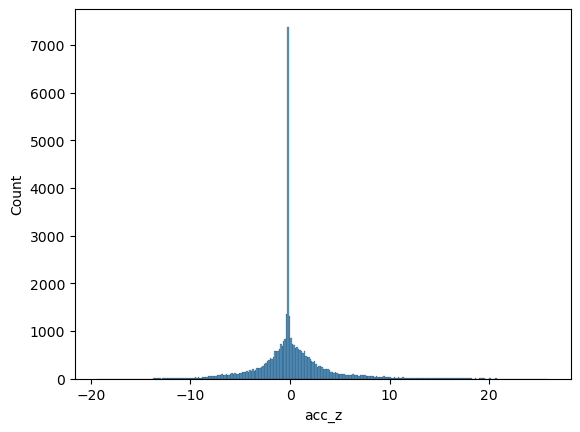

In [15]:
sns.histplot(df['acc_z'])     # Plot a histogram of 'gfc_x'
plt.show()                   # Show the plot

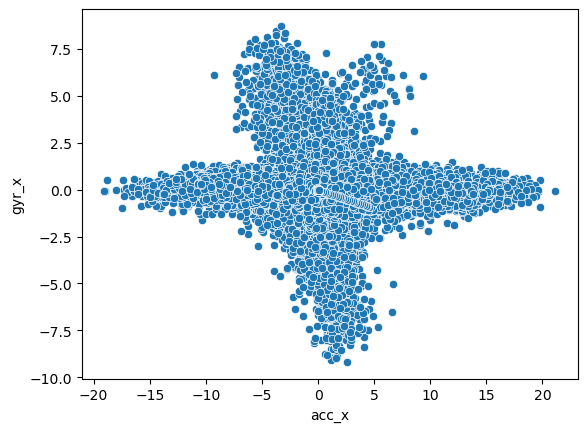

In [16]:
sns.scatterplot(x='acc_x', y='gyr_x', data=df)   # Plot a scatter plot of 'acc_x' vs 'acc_y'
plt.show()                                      # Show the plot

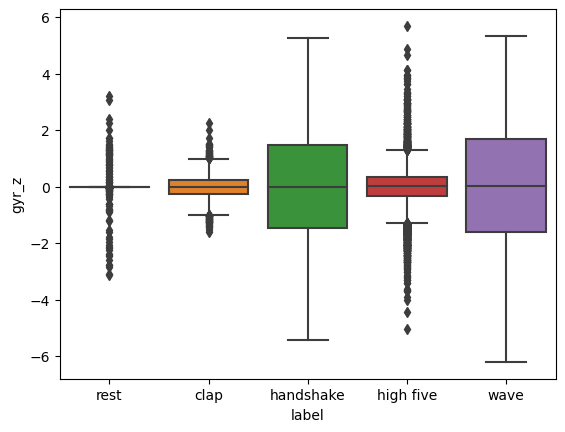

In [17]:
sns.boxplot(x='label', y='gyr_z', data=df)      # Plot a box plot of 'gyr_z' grouped by 'label'
plt.show()   

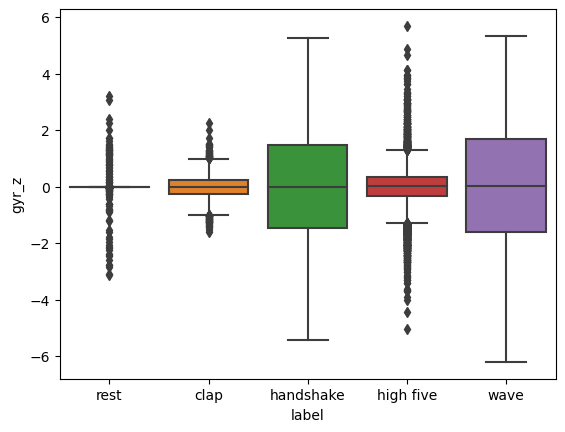

In [18]:
sns.boxplot(x='label', y='gyr_z', data=df)      # Plot a box plot of 'gyr_z' grouped by 'label'
plt.show()                                     # Show the plot


In [13]:
# df1 = df
# df1['time'] = pd.to_datetime(df1['time'])
# df1['time'] = df1['time'].dt.strftime('%H:%M:%S')
# df

,time,gfc_x,gfc_y,gfc_z,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,inc_x,inc_y,inc_z,label
0,16:44:56,0.0117,0.0169,0.9767,0.0000,0.00000,0.00000,0.025950,-0.003650,-0.130100,0.00,0.00,0.00,0.000000,0.000000,0.00000,rest
1,16:44:56,0.0117,0.0169,0.9767,0.0000,0.00000,0.00000,0.051900,-0.007300,-0.260200,176.22,78.18,-24.72,0.000000,0.000000,0.00000,rest
2,16:44:56,0.0171,0.0222,0.9760,-0.0021,-0.00270,-0.11890,0.051900,-0.007300,-0.260200,176.22,78.18,-24.72,261.352275,-0.978525,0.75285,rest
3,16:44:56,0.0171,0.0222,0.9760,-0.0042,-0.00540,-0.23780,0.051900,-0.007300,-0.260200,179.88,80.88,-28.08,348.469700,-1.304700,1.00380,rest
4,16:44:56,0.0193,0.0198,0.9762,0.0018,-0.01195,-0.23660,0.036475,-0.007625,-0.196225,179.88,80.88,-28.08,318.916325,-1.257000,1.04580,rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294694,18:23:09,0.0191,0.0205,0.9872,0.0507,0.02490,-0.12920,-0.002100,0.002150,-0.002750,192.30,66.60,8.88,189.549100,-1.029700,0.79500,rest
294695,18:23:09,0.0166,0.0244,0.9772,0.0381,0.04305,-0.17825,0.000175,0.015400,-0.002400,192.30,66.60,8.88,189.553750,-1.038250,0.80055,rest
294696,18:23:09,0.0166,0.0244,0.9772,0.0255,0.06120,-0.22730,-0.000600,0.011600,-0.001200,192.06,66.84,8.64,189.555300,-1.041100,0.80240,rest
294697,18:23:09,0.0188,0.0132,0.9887,0.0380,0.00625,-0.17105,-0.006700,-0.028700,-0.000300,192.06,66.84,8.64,189.557325,-1.040350,0.78710,rest


In [5]:
df = df.dropna()

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_data(df, acc=None, gyr=None, mag=None, inc=None, gfc=None, label=None, title=None):
    # Convert the 'time' column to datetime type
    df['time'] = pd.to_datetime(df['time'])

    # Determine the number of subplots based on the provided parameters
    num_subplots = sum(param is not None for param in [acc, gyr, mag, inc, gfc, label])

    # Create subplots
    fig, axs = plt.subplots(num_subplots, 1, figsize=(12, 2 * num_subplots), sharex=True)

    # Set the title based on the variable name
    if title is not None:
        fig.suptitle(title)

    # Track the current subplot index
    subplot_index = 0
    alpha = 0.8
    # Plot the sensor data
    if acc is not None:
        axs[subplot_index].plot(df['time'], df['acc_x'], label='acc_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['acc_y'], label='acc_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['acc_z'], label='acc_z', alpha=alpha)
        axs[subplot_index].set_ylabel('Acceleration')
        axs[subplot_index].legend()
        subplot_index += 1

    if gyr is not None:
        axs[subplot_index].plot(df['time'], df['gyr_x'], label='gyr_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['gyr_y'], label='gyr_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['gyr_z'], label='gyr_z', alpha=alpha)
        axs[subplot_index].set_ylabel('Angular Velocity')
        axs[subplot_index].legend()
        subplot_index += 1
        
    if gfc is not None:
        axs[subplot_index].plot(df['time'], df['gfc_x'], label='gfc_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['gfc_y'], label='gfc_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['gfc_z'], label='gfc_z', alpha=alpha)
        axs[subplot_index].set_ylabel('G-Force')
        axs[subplot_index].legend()
        subplot_index += 1

    if inc is not None:
        axs[subplot_index].plot(df['time'], df['inc_x'], label='inc_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['inc_y'], label='inc_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['inc_z'], label='inc_z', alpha=alpha)
        axs[subplot_index].set_ylabel('Inclination')
        axs[subplot_index].legend()
        subplot_index += 1
        
    if mag is not None:
        axs[subplot_index].plot(df['time'], df['mag_x'], label='mag_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['mag_y'], label='mag_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['mag_z'], label='mag_z', alpha=alpha)
        axs[subplot_index].set_ylabel('Magnetic Field')
        axs[subplot_index].legend()
        subplot_index += 1

    if label is not None:
        # Convert the 'label' column to strings for plotting
        df['label'] = df['label'].astype(str)
        unique_labels = df['label'].unique()  # Get unique labels
        symbols = ['o', 's', '^', 'D', 'v']  # List of symbols to use
        y_value = 0.5  # Desired y-value for most symbols
        o_y_value = 0.3  # Desired y-value for the 'o' symbol

        for label, symbol in zip(unique_labels, symbols):
            label_data = df[df['label'] == label]
            x_values = label_data['time']
            y_values = [y_value] * len(label_data)  # Set y-value for most symbols

            if symbol == 'o':
                y_values = [o_y_value] * len(label_data)  # Set y-value for 'o' symbol

            axs[subplot_index].scatter(x_values, y_values, marker=symbol, label=label, alpha=alpha)

        axs[subplot_index].set_yticks([y_value, o_y_value])  # Set y-axis ticks at desired y-values
        axs[subplot_index].set_yticklabels(['', 'o'])  # Set y-axis tick labels
        axs[subplot_index].set_ylabel('')  # Remove y-axis label
        axs[subplot_index].legend()


    # Make sure we get a nice figure with only a single x-axis and labels there.
    plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
    plt.xlabel('time')

    # Format x-axis tick labels to display only hours, minutes, and seconds
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.gcf().autofmt_xdate()

    # Adjust rotation of x-axis tick labels and move them a bit to the right
    plt.xticks(rotation=0, ha='center')

    # Adjust the padding between the x-axis tick labels and the plot
    plt.gca().tick_params(axis='x', pad=4)


    # Adjust the layout
    fig.tight_layout()

    # Show the plot
    plt.show()


# Example usage
# plot_data(df, acc=1, gyr=2, mag=3, inc=4, gfc=5, label=6 ,title="Row Data")


In [6]:
import numpy as np
from scipy.fft import fft


IndexError: index 5 is out of bounds for axis 0 with size 5

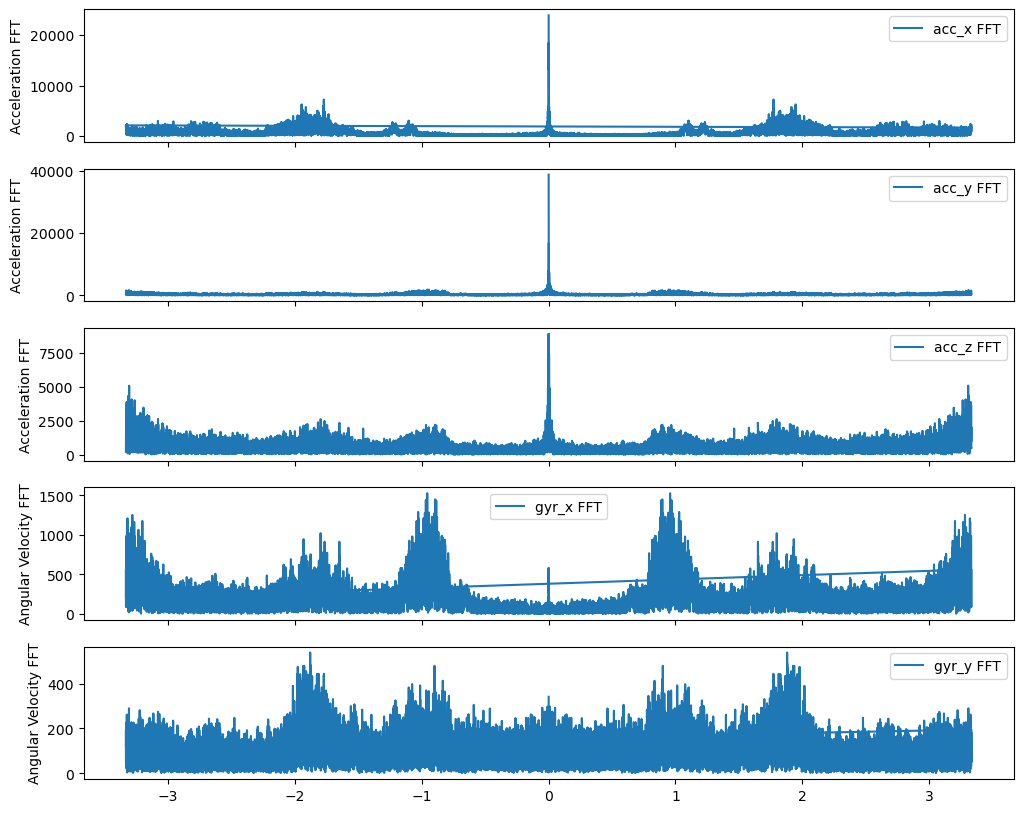

In [10]:
def plot_data(df, acc=None, gyr=None, mag=None, inc=None, gfc=None, label=None, title=None):
    # Convert the 'time' column to datetime type
    df['time'] = pd.to_datetime(df['time'])

    # Perform Fourier transformation for all sensor data
    if acc is not None or gyr is not None or mag is not None or inc is not None or gfc is not None:
        # Calculate the corresponding frequencies
        freq = np.fft.fftfreq(len(df['time']), d=(df['time'][1] - df['time'][0]).total_seconds())

        # Determine the number of subplots based on the provided parameters
        num_subplots = sum(param is not None for param in [acc, gyr, mag, inc, gfc])

        # Create subplots for the Fourier transformed data
        fig_fft, axs_fft = plt.subplots(num_subplots, 1, figsize=(12, 2 * num_subplots), sharex=True)

        # Perform Fourier transformation and plot the transformed data for each sensor
        subplot_index = 0

        if acc is not None:
            acc_axes = ['acc_x', 'acc_y', 'acc_z']
            for axis in acc_axes:
                acc_fft = np.fft.fft(df[axis].values)
                axs_fft[subplot_index].plot(freq, np.abs(acc_fft), label=f'{axis} FFT')
                axs_fft[subplot_index].set_ylabel('Acceleration FFT')
                axs_fft[subplot_index].legend()
                subplot_index += 1

        if gyr is not None:
            gyr_axes = ['gyr_x', 'gyr_y', 'gyr_z']
            for axis in gyr_axes:
                gyr_fft = np.fft.fft(df[axis].values)
                axs_fft[subplot_index].plot(freq, np.abs(gyr_fft), label=f'{axis} FFT')
                axs_fft[subplot_index].set_ylabel('Angular Velocity FFT')
                axs_fft[subplot_index].legend()
                subplot_index += 1

        if mag is not None:
            mag_axes = ['mag_x', 'mag_y', 'mag_z']
            for axis in mag_axes:
                mag_fft = np.fft.fft(df[axis].values)
                axs_fft[subplot_index].plot(freq, np.abs(mag_fft), label=f'{axis} FFT')
                axs_fft[subplot_index].set_ylabel('Magnetic Field FFT')
                axs_fft[subplot_index].legend()
                subplot_index += 1

        if inc is not None:
            inc_axes = ['inc_x', 'inc_y', 'inc_z']
            for axis in inc_axes:
                inc_fft = np.fft.fft(df[axis].values)
                axs_fft[subplot_index].plot(freq, np.abs(inc_fft), label=f'{axis} FFT')
                axs_fft[subplot_index].set_ylabel('Inclination FFT')
                axs_fft[subplot_index].legend()
                subplot_index += 1

        if gfc is not None:
            gfc_axes = ['gfc_x', 'gfc_y', 'gfc_z']
            for axis in gfc_axes:
                gfc_fft = np.fft.fft(df[axis].values)
                axs_fft[subplot_index].plot(freq, np.abs(gfc_fft), label=f'{axis} FFT')
                axs_fft[subplot_index].set_ylabel('G-Force FFT')
                axs_fft[subplot_index].legend()
                subplot_index += 1

        # Set the xlabel for all subplots
        for ax in axs_fft:
            ax.set_xlabel('Frequency')

        # Set the title of the plot
        if title:
            fig_fft.suptitle(title)

        # Adjust the layout
        fig_fft.tight_layout()

        # Show the plot
        plt.show()


        
    
        
df = pd.read_csv('gestures_v2.csv')
plot_data(df, acc=1, gyr=2, mag=3, inc=4, gfc=5, label=6 ,title="Row Data")


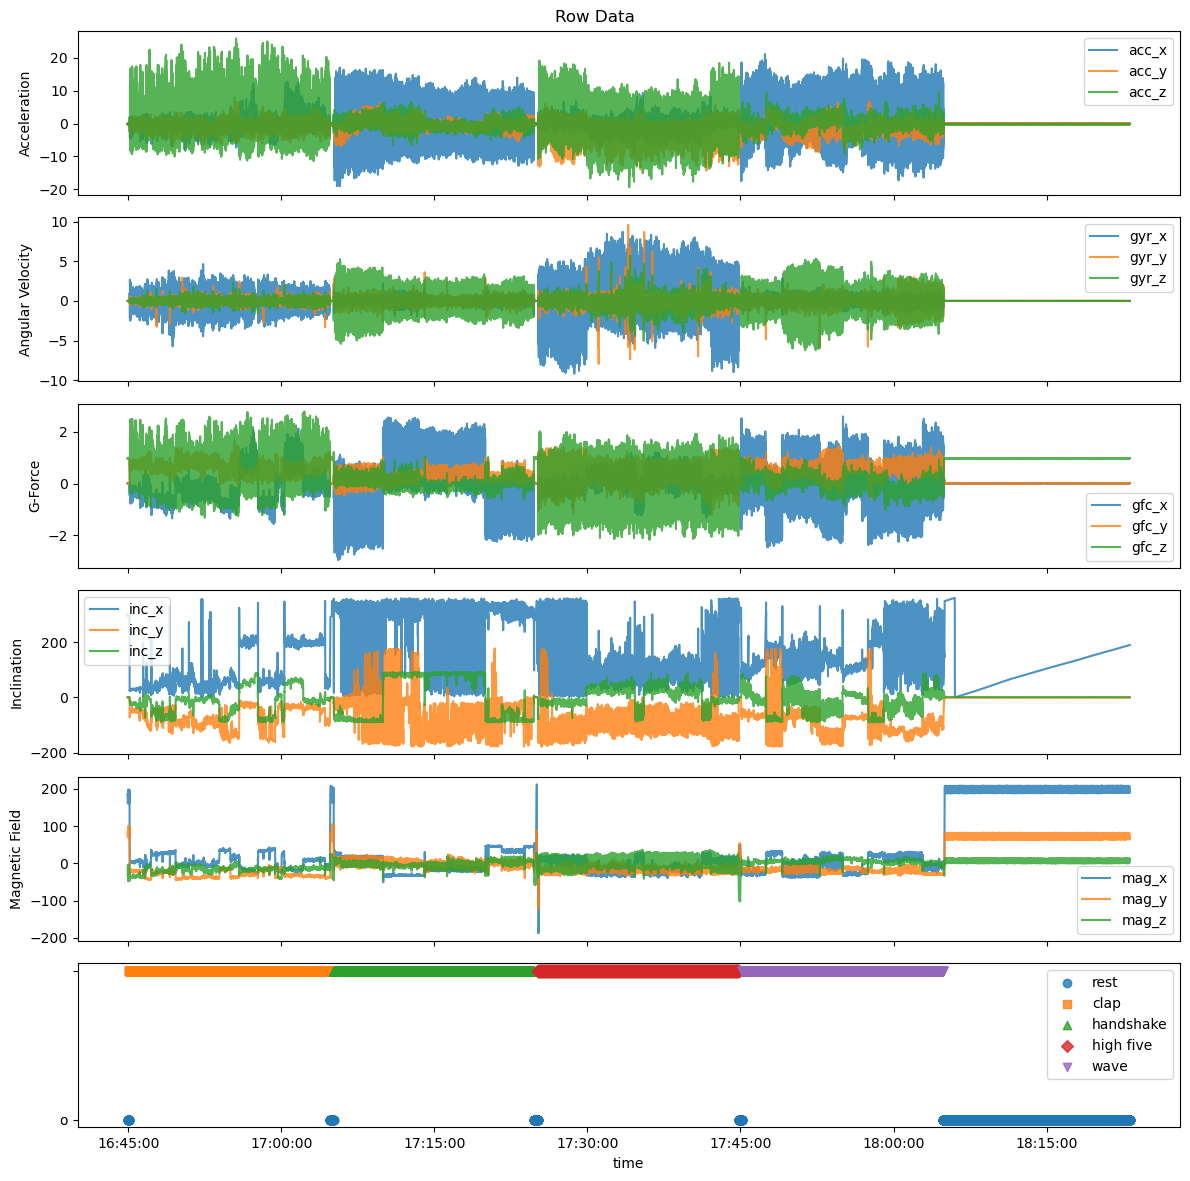

In [20]:
plot_data(df, acc=1, gyr=2, mag=3, inc=4, gfc=5, label=6 ,title="Row Data")


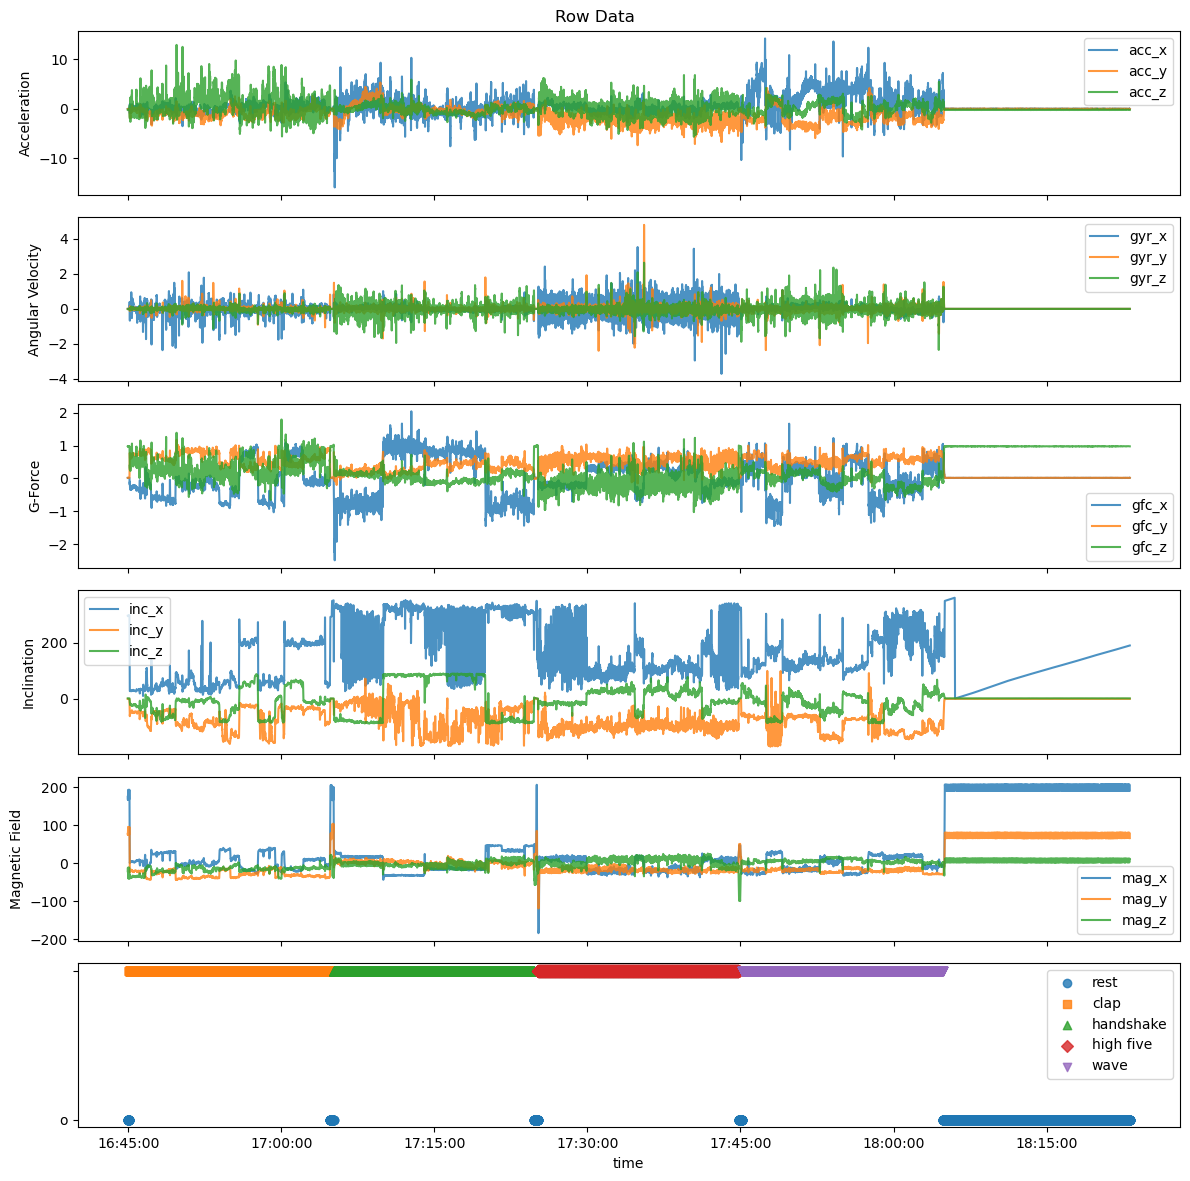

In [21]:
# Applying Moving Average smoothing with a window size of 
import pandas as pd

def smooth_dataframe(df, window_size):
    smoothed_df = df.copy()  # Create a copy of the original DataFrame
    
    for column in df.columns:
        if column not in ['time', 'label']:
            smoothed_df[column] = df[column].rolling(window=window_size, center=True).mean()
    
    return smoothed_df

window_size = 10  # Adjust the window size as per your requirement
smoothed_data = smooth_dataframe(df, window_size)

plot_data(smoothed_data, acc=1, gyr=2, mag=3, inc=4, gfc=5, label=6 ,title="Row Data")


In [98]:
handshake[1000:1100].head(15)

,time,gfc_x,gfc_y,gfc_z,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,inc_x,inc_y,inc_z,label
61572,2023-06-08 17:05:27.460,-3.3868,-0.3916,0.2690,-17.684233,-9.046267,2.162900,0.582200,-1.735500,-5.202100,27.720,-2.220,1.440,335.392033,-14.300167,-78.089833,handshake
61573,2023-06-08 17:05:27.480,-3.3868,-0.3916,0.2690,-23.770700,-5.550200,0.514700,0.565467,-1.312167,-2.948433,28.020,4.200,1.620,337.882300,-10.055900,-77.309400,handshake
61574,2023-06-08 17:05:27.500,-2.7746,-0.1253,0.1747,-21.771000,-4.468433,0.077967,0.365300,-0.100800,-0.645100,28.020,4.200,1.620,339.640967,-7.554033,-75.832400,handshake
61575,2023-06-08 17:05:27.520,-2.7746,-0.1253,0.1747,-17.771600,-2.304900,-0.795500,-0.167600,1.830767,1.556267,27.420,8.360,1.860,340.520300,-6.303100,-75.093900,handshake
61576,2023-06-08 17:05:27.540,-1.8606,-0.0887,0.1910,-17.771600,-2.304900,-0.795500,-0.326800,1.693900,2.326800,27.120,10.440,1.980,339.631050,-8.216750,-77.065100,handshake
61577,2023-06-08 17:05:27.560,-1.8606,-0.0887,0.1910,-8.756700,-2.594000,0.036200,-0.359325,1.094500,2.767850,26.355,14.085,2.655,338.741800,-10.130400,-79.036300,handshake
61578,2023-06-08 17:05:27.580,-1.2914,-0.0596,0.3000,-8.756700,-2.594000,0.036200,-0.400700,0.229700,3.439800,26.100,15.300,2.880,336.794800,-13.677500,-79.335500,handshake
61579,2023-06-08 17:05:27.600,-1.2914,-0.0596,0.3000,-3.441800,-3.488100,1.254800,-0.454450,0.323175,3.955825,26.010,16.410,3.330,334.847800,-17.224600,-79.634700,handshake
61580,2023-06-08 17:05:27.620,-0.2780,0.0818,0.4134,-3.441800,-3.488100,1.254800,-0.478900,0.551000,4.505700,25.920,17.520,3.780,331.447300,-21.898800,-79.527250,handshake
61581,2023-06-08 17:05:27.640,-0.2780,0.0818,0.4134,5.897000,-3.584800,2.440600,-0.268000,0.578025,4.628650,26.685,15.990,3.015,328.046800,-26.573000,-79.419800,handshake


In [111]:
window_size=2

x = smooth_dataframe(handshake[1000:1020], window_size)
x.head(20)

,time,gfc_x,gfc_y,gfc_z,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,inc_x,inc_y,inc_z,label
61572,2023-06-08 17:05:27.460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,handshake
61573,2023-06-08 17:05:27.480,-3.38680,-0.39160,0.26900,-20.727467,-7.298233,1.338800,0.573833,-1.523833,-4.075267,27.8700,0.9900,1.5300,336.637167,-12.178033,-77.699617,handshake
61574,2023-06-08 17:05:27.500,-3.08070,-0.25845,0.22185,-22.770850,-5.009317,0.296333,0.465383,-0.706483,-1.796767,28.0200,4.2000,1.6200,338.761633,-8.804967,-76.570900,handshake
61575,2023-06-08 17:05:27.520,-2.77460,-0.12530,0.17470,-19.771300,-3.386667,-0.358767,0.098850,0.864983,0.455583,27.7200,6.2800,1.7400,340.080633,-6.928567,-75.463150,handshake
61576,2023-06-08 17:05:27.540,-2.31760,-0.10700,0.18285,-17.771600,-2.304900,-0.795500,-0.247200,1.762333,1.941533,27.2700,9.4000,1.9200,340.075675,-7.259925,-76.079500,handshake
61577,2023-06-08 17:05:27.560,-1.86060,-0.08870,0.19100,-13.264150,-2.449450,-0.379650,-0.343062,1.394200,2.547325,26.7375,12.2625,2.3175,339.186425,-9.173575,-78.050700,handshake
61578,2023-06-08 17:05:27.580,-1.57600,-0.07415,0.24550,-8.756700,-2.594000,0.036200,-0.380012,0.662100,3.103825,26.2275,14.6925,2.7675,337.768300,-11.903950,-79.185900,handshake
61579,2023-06-08 17:05:27.600,-1.29140,-0.05960,0.30000,-6.099250,-3.041050,0.645500,-0.427575,0.276438,3.697812,26.0550,15.8550,3.1050,335.821300,-15.451050,-79.485100,handshake
61580,2023-06-08 17:05:27.620,-0.78470,0.01110,0.35670,-3.441800,-3.488100,1.254800,-0.466675,0.437088,4.230762,25.9650,16.9650,3.5550,333.147550,-19.561700,-79.580975,handshake
61581,2023-06-08 17:05:27.640,-0.27800,0.08180,0.41340,1.227600,-3.536450,1.847700,-0.373450,0.564512,4.567175,26.3025,16.7550,3.3975,329.747050,-24.235900,-79.473525,handshake


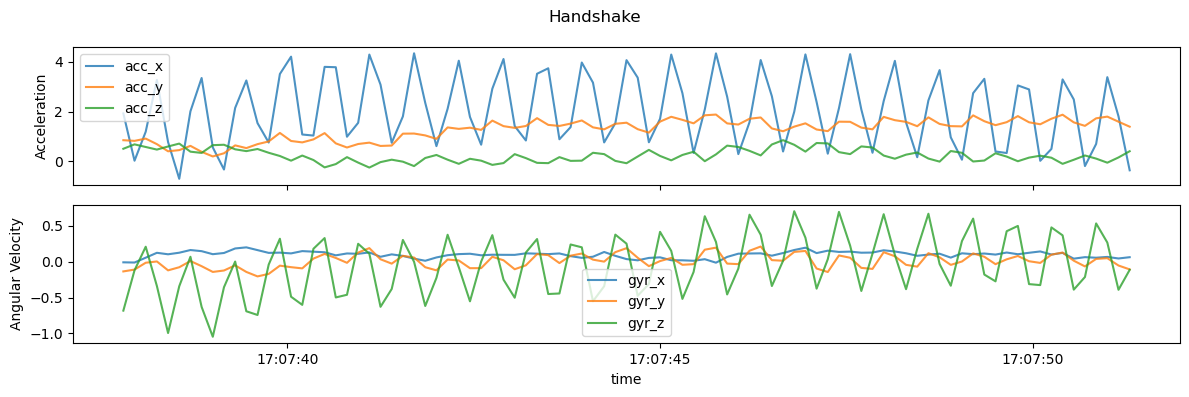

In [22]:
handshake = df[df['label']=='handshake']
plot_data(smooth_dataframe(handshake[1000:1100], window_size),acc=1 ,gyr=2,title='Handshake')


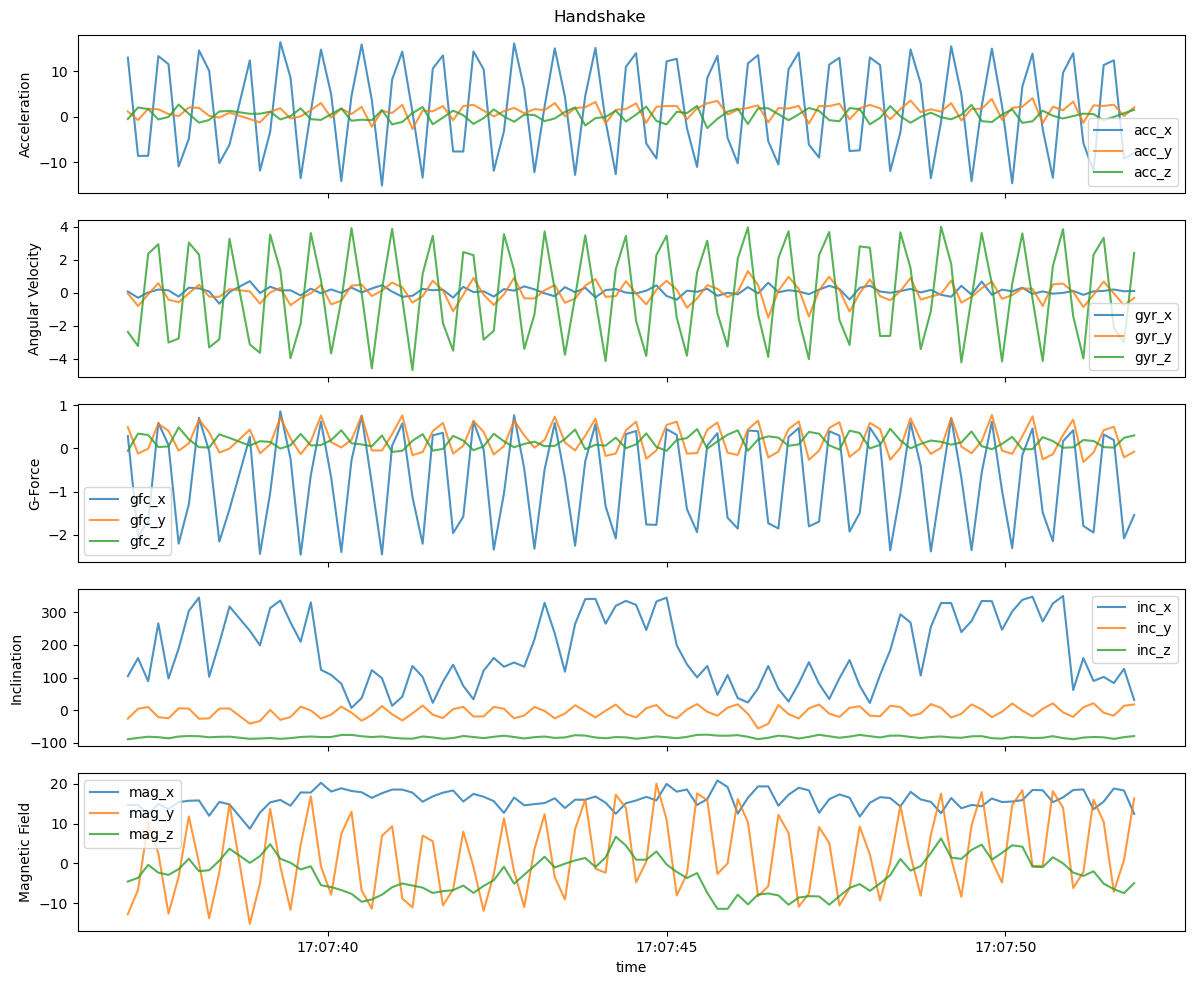

In [23]:
handshake = df[df['label']=='handshake']
plot_data(handshake[1000:1100],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='Handshake')


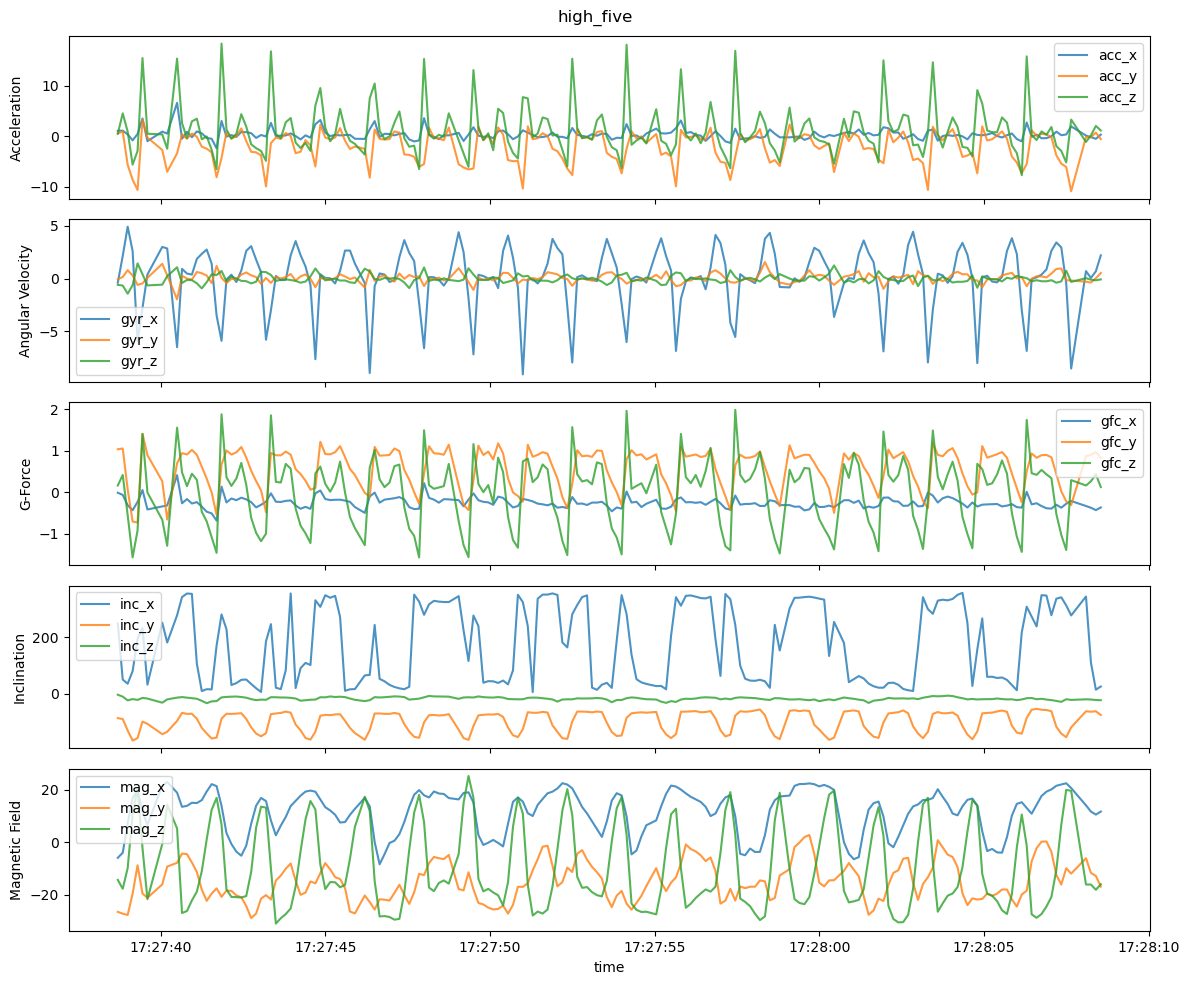

In [24]:
high_five = df[df['label']=='high five']
plot_data(high_five[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title="high_five")


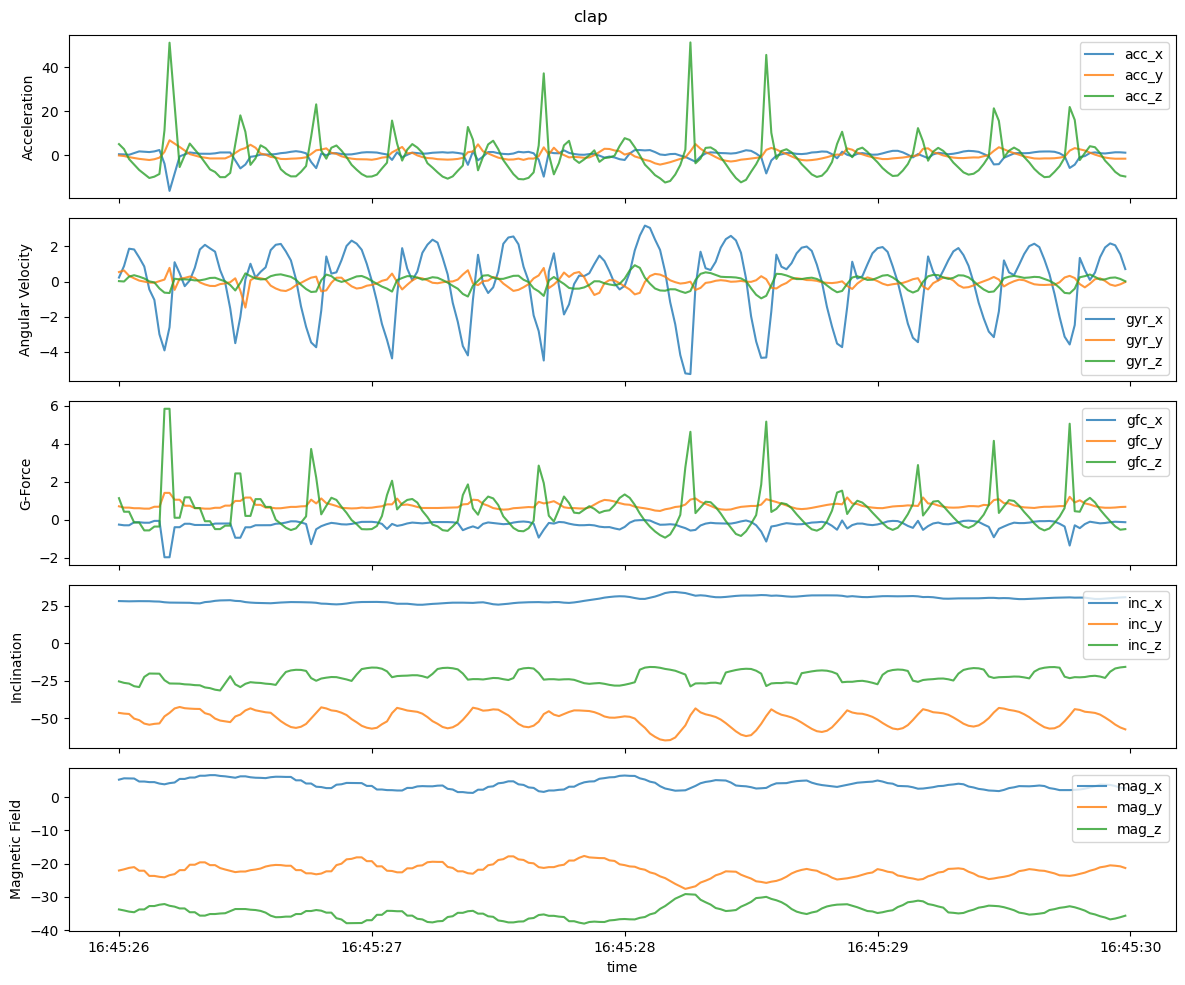

In [73]:
clap = df[df['label']=='clap']
plot_data(clap[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='clap')


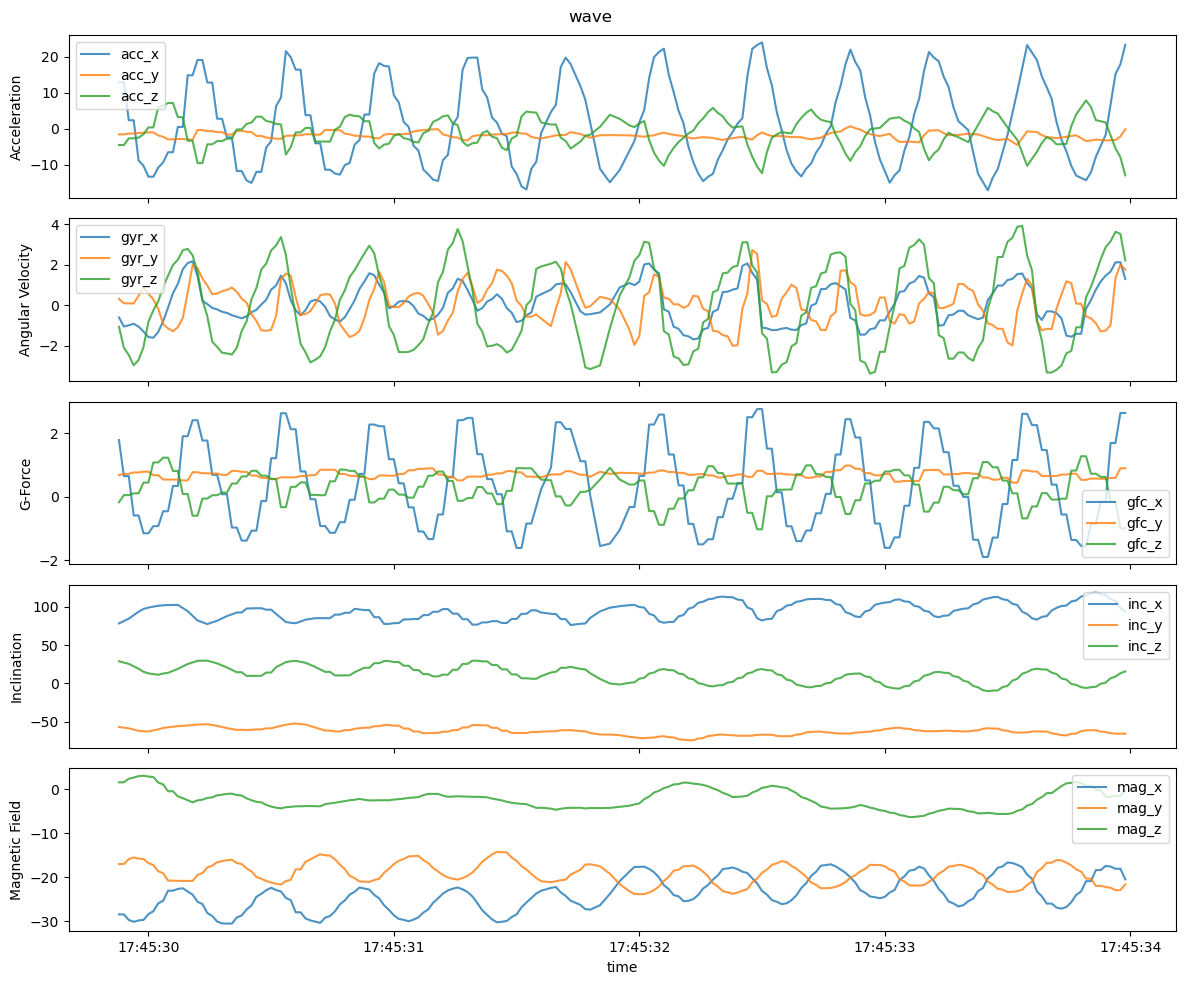

In [74]:
wave = df[df['label']=='wave']
plot_data(wave[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='wave')


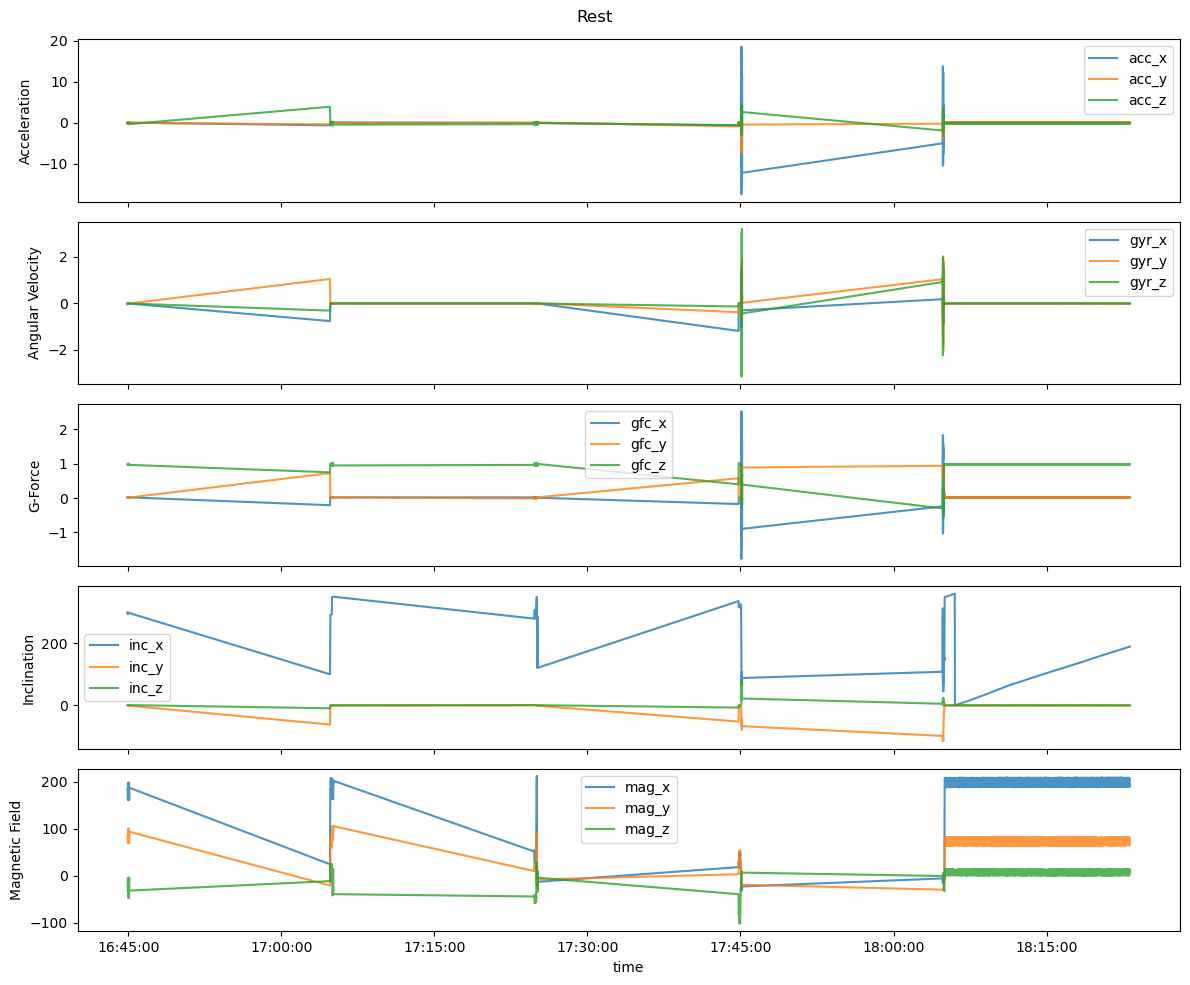

In [25]:
rest = df[df['label']=='rest']
plot_data(rest,acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='Rest')

In [118]:
df['label'].unique()

array(['rest', 'clap', nan, 'handshake', 'high five', 'wave'],
      dtype=object)

In [ ]:
from scipy.signal import savgol_filter

# plot_data(wave[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='wave')



# Sort the DataFrame by the time column (if not already sorted)
df1 = wave.sort_values('time')

# Apply the Savitzky-Golay filter to smooth the accelerometer data
window_length = 7  # Adjust this parameter to change the smoothing effect
poly_order = 2     # Adjust this parameter to change the polynomial order
df1['acc_x'] = savgol_filter(df1['acc_x'], window_length, poly_order)
df1['acc_y'] = savgol_filter(df1['acc_y'], window_length, poly_order)
df1['acc_z'] = savgol_filter(df1['acc_z'], window_length, poly_order)

# Print the smoothed data
plot_data(df1[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='wave')


In [ ]:
def moving_average(signal, window_size):
    window = np.ones(window_size) / window_size
    smoothed_signal = np.convolve(signal, window, mode='same')
    return smoothed_signal

# Example usage
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, size=len(x))  # Simulated noisy signal

window_size = 5  # Adjust the window size as needed
smoothed_y = moving_average(y, window_size)

# Plot the original and smoothed signals
plt.plot(x, y, label='Original Signal')
plt.plot(x, smoothed_y, label='Smoothed Signal')
plt.legend()
plt.show()

# Data prep

In [ ]:
aaa

In [ ]:
from scipy.stats import shapiro

def check_normality(df):
    normality_results = {}
    for column in df.columns:
        if df[column].dtype != 'object' and df[column].dtype != 'datetime64[ns]':
            _, p_value = shapiro(df[column])
            normality_results[column] = p_value
    return normality_results
normality_results = check_normality(df)
for column, p_value in normality_results.items():
    if p_value > 0.05:
        print(f"{column} is normally distributed")
    else:
        print(f"{column} is not normally distributed")


In [ ]:
df

In [ ]:
new_data = df.copy()  # Create a copy of the original DataFrame

new_data['time'] = pd.to_datetime(new_data['time'])
new_data

In [ ]:
new_data = df.copy()  # Create a copy of the original DataFrame

new_data['time'] = pd.to_datetime(new_data['time'])
new_data['date'] = new_data['time'].dt.strftime('%Y-%m-%d')
new_data['time'] = new_data['time'].dt.strftime('%H:%M:%S')

# Display the updated DataFrame
new_data.head()

In [ ]:
from scipy.signal import savgol_filter


In [ ]:
# Convert the 'time' column to datetime type
df['time'] = pd.to_datetime(df['time'])

# Set the desired time range
start_time = '16:50'
end_time = '16:50:30'

# Filter the DataFrame based on the time range
filtered_df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

# Plotting the sensor data
# fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Accelerometer data
# plt.plot(filtered_df['time'], filtered_df['acc_x'], label='acc_x')
# plt.plot(filtered_df['time'], filtered_df['acc_y'], label='acc_y')
plt.plot(filtered_df['time'], filtered_df['acc_y'], label='acc_z')

yhat = savgol_filter(filtered_df['acc_y'], 50, 2) # window size 51, polynomial order 3

plt.plot(filtered_df['time'], yhat, label='acc_x')

plt.title('Claping Acceleration')
plt.legend()

# Repeat the above steps for other sensor data if desired

plt.show()


In [3]:
from sklearn.neighbors import LocalOutlierFactor


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.      0.     -0.0021 ...  0.0255  0.038   0.0505].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.